In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import cv2
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/data')

print(os.listdir())

['with_mask', 'without_mask']


In [ ]:
with_mask_path = "/content/drive/MyDrive/data/with_mask"
without_mask_path = "/content/drive/MyDrive/data/without_mask"

In [ ]:
# List of image files in both directories
with_mask_files = os.listdir(with_mask_path)
without_mask_files = os.listdir(without_mask_path)

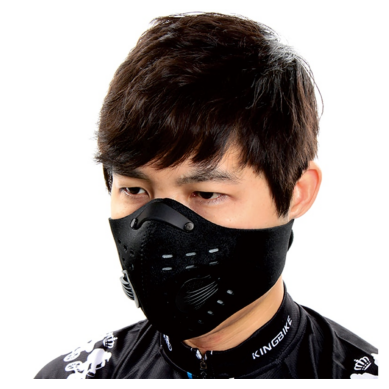

In [ ]:
image_path = os.path.join(with_mask_path, with_mask_files[0])
image = Image.open(image_path)
plt.imshow(image)
plt.axis("off")
plt.show()

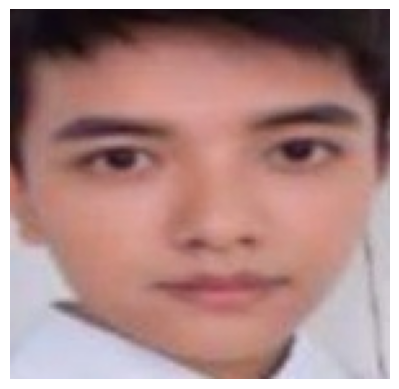

In [ ]:
image_path = os.path.join(without_mask_path, without_mask_files[4])
image = Image.open(image_path)
plt.imshow(image)
plt.axis("off")
plt.show()

In [ ]:
print(f"Total images with mask: {len(with_mask_files)}")
print(f"Total images without mask: {len(without_mask_files)}")

Total images with mask: 3725
Total images without mask: 3828


In [ ]:
label_map = {
    'with_mask': 0,
    'without_mask': 1
}


In [ ]:
image_filenames = ([os.path.join(with_mask_path, file) for file in with_mask_files] +
                   [os.path.join(without_mask_path, file) for file in without_mask_files])

# Assign labels based on directory
labels = [label_map['with_mask'] if with_mask_path in file else label_map['without_mask'] for file in image_filenames]

In [ ]:
print(f"Total images: {len(image_filenames)}")
print(f"Labels: {labels[:10]}")

Total images: 7553
Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
data = []
labels = []

for img_file in with_mask_files:
    image_path = os.path.join(with_mask_path, img_file)
    image = Image.open(image_path)
    image = image.convert('RGB')
    image = image.resize((128, 128))
    image = np.array(image)
    data.append(image)
    labels.append(0)


for img_file in without_mask_files:
    image_path = os.path.join(without_mask_path, img_file)
    image = Image.open(image_path)
    image = image.convert('RGB')
    image = image.resize((128, 128))
    image = np.array(image)
    data.append(image)
    labels.append(1)


data = np.array(data)
labels = np.array(labels)

print(f"Total images processed: {len(data)}")
print(f"Image shape: {data[0].shape}")
print(f"Total labels: {len(labels)} (First 10 labels: {labels[:10]})")

Total images processed: 7553
Image shape: (128, 128, 3)
Total labels: 7553 (First 10 labels: [0 0 0 0 0 0 0 0 0 0])


In [ ]:
len(data)

7553

In [ ]:
len(labels)

7553

In [ ]:
x = np.array(data)
y = np.array(labels)

In [ ]:
#import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train_scale = x_train/255
x_test_scale = x_test/255

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size= (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,kernel_size= (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_scale, y_train, epochs=5, validation_data=(x_test_scale, y_test))

Epoch 1/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 116s 613ms/step - accuracy: 0.9340 - loss: 0.1588 - val_accuracy: 0.9219 - val_loss: 0.2161
Epoch 2/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 118s 626ms/step - accuracy: 0.9556 - loss: 0.1137 - val_accuracy: 0.9265 - val_loss: 0.2262
Epoch 3/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 135s 591ms/step - accuracy: 0.9608 - loss: 0.1009 - val_accuracy: 0.9371 - val_loss: 0.2217
Epoch 4/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 144s 603ms/step - accuracy: 0.9721 - loss: 0.0794 - val_accuracy: 0.9332 - val_loss: 0.2491
Epoch 5/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 114s 606ms/step - accuracy: 0.9703 - loss: 0.0825 - val_accuracy: 0.9345 - val_loss: 0.2744


In [ ]:
loss, accuracy = model.evaluate(x_test_scale, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - accuracy: 0.9445 - loss: 0.2980
Test Loss: 0.2744
Test Accuracy: 93.45%


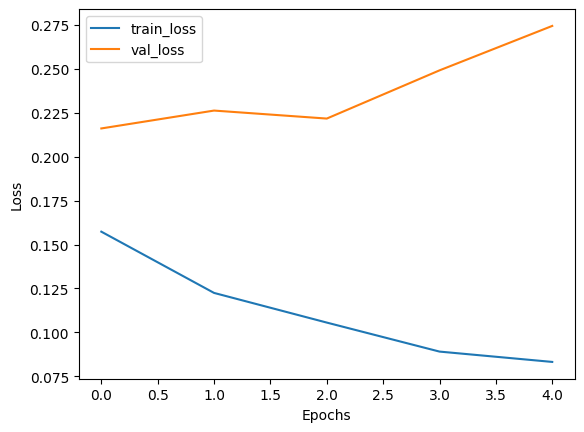

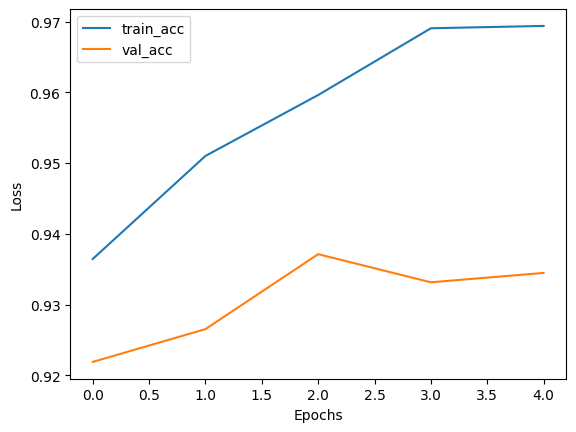

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

As Validation loss is not decreasing it seems a case of overfitting so applying early stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

one_history = model.fit(
    x_train_scale, y_train,
    epochs=5,
    validation_data=(x_test_scale, y_test),
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 118s 624ms/step - accuracy: 0.9779 - loss: 0.0642 - val_accuracy: 0.9477 - val_loss: 0.2945
Epoch 2/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 116s 613ms/step - accuracy: 0.9846 - loss: 0.0348 - val_accuracy: 0.9490 - val_loss: 0.3474
Epoch 3/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 138s 593ms/step - accuracy: 0.9868 - loss: 0.0427 - val_accuracy: 0.9477 - val_loss: 0.2475
Epoch 4/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 143s 598ms/step - accuracy: 0.9870 - loss: 0.0425 - val_accuracy: 0.9378 - val_loss: 0.2983
Epoch 5/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 146s 617ms/step - accuracy: 0.9888 - loss: 0.0327 - val_accuracy: 0.9490 - val_loss: 0.2985


In [ ]:
loss, accuracy = model.evaluate(x_test_scale, y_test, verbose=1)

# Print results
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")


48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.9526 - loss: 0.2691
Test Loss: 0.2475
Test Accuracy: 94.77%


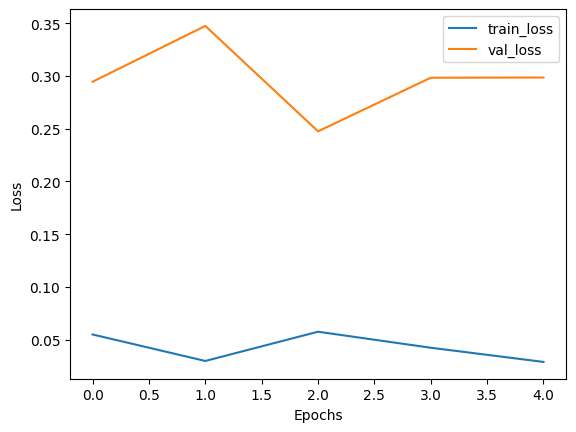

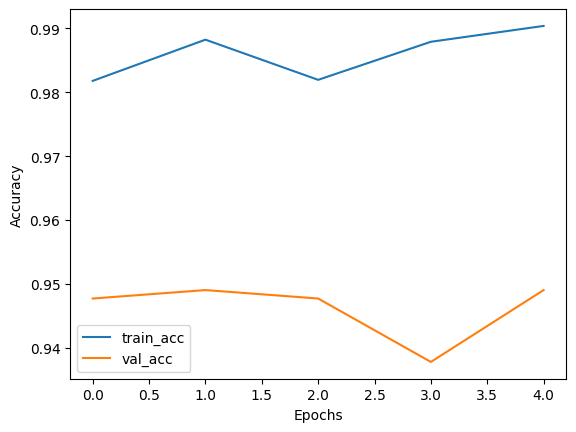

In [ ]:
# Plot Training & Validation Loss
plt.plot(one_history.history['loss'], label='train_loss')
plt.plot(one_history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training & Validation Accuracy
plt.plot(one_history.history['accuracy'], label='train_acc')
plt.plot(one_history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# BETTER MODEL

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

better_model = Sequential()

better_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
better_model.add(MaxPooling2D(pool_size=(2, 2)))

better_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
better_model.add(MaxPooling2D(pool_size=(2, 2)))

better_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)))
better_model.add(MaxPooling2D(pool_size=(2, 2)))

better_model.add(Flatten())

better_model.add(Dense(256, activation='relu'))
better_model.add(Dropout(0.5))

better_model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
better_model.add(Dropout(0.3))

better_model.add(Dense(64, activation='relu'))
better_model.add(Dropout(0.3))

better_model.add(Dense(1, activation='sigmoid'))

better_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,557,249 (25.01 MB)

 Trainable params: 6,557,249 (25.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
better_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize images
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(x_train_scale, y_train, batch_size=32)
test_generator = test_datagen.flow(x_test_scale, y_test, batch_size=32)


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stops training if no improvement for 5 epochs
    restore_best_weights=True
)


In [ ]:
better_history = better_model.fit(
    train_generator,
    epochs=30,  # Increased epochs for better learning
    validation_data=test_generator,
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 236s 1s/step - accuracy: 0.5042 - loss: 0.9133 - val_accuracy: 0.4964 - val_loss: 0.8331
Epoch 2/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.5090 - loss: 0.8150 - val_accuracy: 0.4964 - val_loss: 0.7739
Epoch 3/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.5109 - loss: 0.7644 - val_accuracy: 0.4964 - val_loss: 0.7416
Epoch 4/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.5357 - loss: 0.7336 - val_accuracy: 0.7790 - val_loss: 0.6216
Epoch 5/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.7326 - loss: 0.5941 - val_accuracy: 0.8458 - val_loss: 0.4015
Epoch 6/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.7921 - loss: 0.4938 - val_accuracy: 0.8379 - val_loss: 0.4070
Epoch 7/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.7916 - loss: 0.4886 - val_accuracy: 0.8445 - val_loss: 0.3862
Epoch 8/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.8050 - loss: 0.4661 - val_accu

In [ ]:
loss, accuracy = better_model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")


48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 288ms/step - accuracy: 0.8855 - loss: 0.2947
Test Loss: 0.2824
Test Accuracy: 88.48%


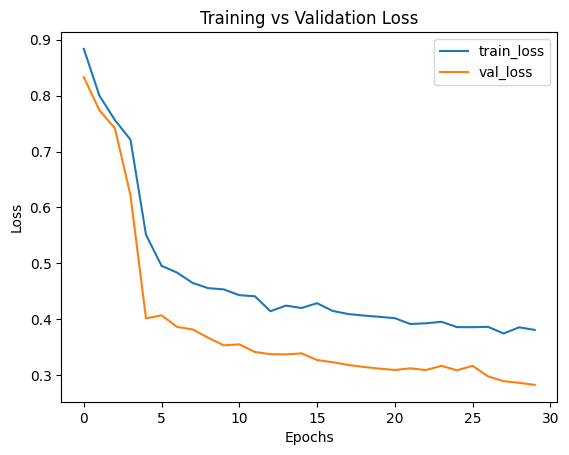

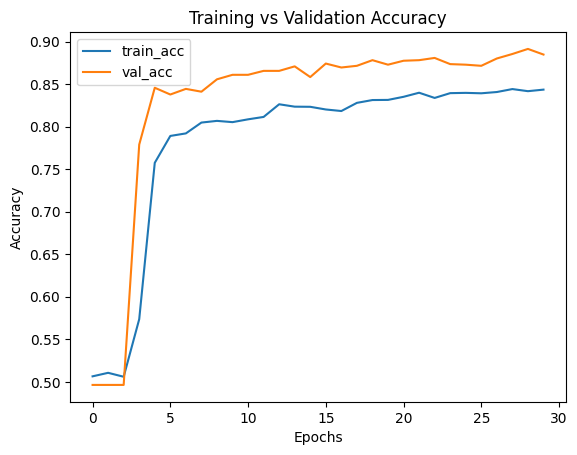

In [ ]:
# Plot Training & Validation Loss
plt.plot(better_history.history['loss'], label='train_loss')
plt.plot(better_history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# Plot Training & Validation Accuracy
plt.plot(better_history.history['accuracy'], label='train_acc')
plt.plot(better_history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


In [61]:
import keras.saving
keras.saving.save_model(better_model, '/content/drive/MyDrive/better_model.keras')
